# Coding Challenge 3: Breast Cancer Classification I
Module 1 | Chapter 2 | Notebook 1

***
In this coding challenge, we'll use the k-nearest-neighbors algorithm to predict the tumor type (benign or malignant). You'll see what you need to keep in mind when using k-nearest-neighbors. By the end of this exercise you will be able to:
* Standardize data using `StandardScaler()`
* Perform a classification using the k-Nearest Neighbors algorithm
***


**Scenario:** You work as a data scientist for a scientific laboratory that specializes in studying cancer cells. Your supervisors ask you to determine whether the tumor found in a series of samples containing breast cancer cells is benign or malignant. The cell samples to be classified are provided to you in the file *breastcancer_aim.csv*. You decide to do the classification using the k-nearest-neighbors algorithm. You should evaluate your model based on accuracy. Your supervisors ask you to determine how many samples contain a malignant tumor.

In order to train your algorithm, training data is provided to you in the file *breastcancer_train.csv*. You can test the performance of your kNN classifier on independent test data *breastcancer_test.csv*. To do this, determine a suitable metric for k-nearest neighbors for classifying whether breast cancer cell samples are benign or malignant.


The following *data dictionary* is provided for your convenience:

Column number | Column name       | Type      | Description
---           | ---                 | ---                 | ---
0            | `id`       | categorical (`int`) | ID number of the cell sample.
1 | `clump_thickness` | numeric (`int`) | clump thickness (on a scale from 1 to 10)
2 | `size_uniformity` | numeric (`int`) | uniformity of cell size (on a scale from 1 to 10)
3 | `shape_uniformity` | numeric (`int`) | uniformity of cell shape (on a scale from 1 to 10)
4 | `marginal_adhesion` | numeric (`int`) | marginal adhesion (on a scale from 1 to 10)
5 | `epithelial_size` | numeric (`int`) | single epithelial cell size (on a scale from 1 to 10)
6 | `bare_nucleoli` | numeric (`int`) | bare nucleoli (on a scale from 1 to 10)
7 | `bland_chromatin` | numeric (`int`) | coarse nucleation of chromatin (on a scale from 1 to 10)
8 | `normal_nucleoli` | numeric (`int`) | Normal nucleoli (on a scale from 1 to 10)
9 | `mitoses` | numeric (`int`) | mitoses (on a scale from 1 to 10)
10 | `class` | categorical (`int`) | tumor type: 0 for `benign`, 1 for `malignant`

Your task is to: 
1. import the data, explore it and clean it up if necessary.
2. prepare the data for your model and evaluate the model.
3. find a suitable $k$ for the number of nearest neighbors for classification. 
4. identify whether the cancer cell samples are benign or malignant.


### 1. Importing the data and EDA

First import the data from *breastcancer_train.csv* and store it in `df_train`, *breastcancer_test.csv* in `df_test` and *breastcancer_aim.csv* in `df_aim`.


In [5]:
import pandas as pd
df = pd.read_csv('breastcancer_train.csv')
print(df.shape)
df.head()

(559, 11)


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1246562,10,2,2,1,2,6.0,1,1,2,1
1,822829,7,6,4,8,10,10.0,9,5,3,1
2,1217264,1,1,1,1,2,1.0,3,1,1,0
3,1296025,4,1,2,1,2,1.0,1,1,1,0
4,1203096,1,1,1,1,1,1.0,3,1,1,0


Now explore the data.


In [2]:
# number of rows and columns
df = df.astype({'class':'category', 'id':'category'})
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 559 non-null    category
 1   clump_thickness    559 non-null    int64   
 2   size_uniformity    559 non-null    int64   
 3   shape_uniformity   559 non-null    int64   
 4   marginal_adhesion  559 non-null    int64   
 5   epithelial_size    559 non-null    int64   
 6   bare_nucleoli      543 non-null    float64 
 7   bland_chromatin    559 non-null    int64   
 8   normal_nucleoli    559 non-null    int64   
 9   mitoses            559 non-null    int64   
 10  class              559 non-null    category
dtypes: category(2), float64(1), int64(8)
memory usage: 61.4 KB


In [3]:
# check for unrealistic or impossible values 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,559.0,4.359571,2.843822,1.0,2.0,4.0,6.0,10.0
size_uniformity,559.0,3.071556,2.981165,1.0,1.0,1.0,4.0,10.0
shape_uniformity,559.0,3.175313,2.931970,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,559.0,2.735242,2.800671,1.0,1.0,1.0,3.0,10.0
epithelial_size,559.0,3.164580,2.182883,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,543.0,3.528545,3.646084,1.0,1.0,1.0,6.0,10.0
bland_chromatin,559.0,3.427549,2.458551,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,559.0,2.833631,3.034901,1.0,1.0,1.0,3.0,10.0
mitoses,559.0,1.554562,1.626442,1.0,1.0,1.0,1.0,10.0


In [4]:
# check data types and convert to correct format
df.shape

(559, 11)

In [5]:
# check for unique values of classes in train- and test set (aim_set does not contain classes)
print('number of unique IDs:', df.id.nunique())
#df[df.duplicated(['id'])]
df[df.bare_nucleoli.isna()]

number of unique IDs: 522


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
25,61634,5,4,3,1,2,NaN,2,3,1,0
30,432809,3,1,3,1,2,NaN,2,1,1,0
88,169356,3,1,1,1,2,NaN,3,1,1,0
89,1193683,1,1,2,1,3,NaN,1,1,1,0
133,1096800,6,6,6,9,6,NaN,7,8,1,0
151,704168,4,6,5,6,7,NaN,4,9,1,0
158,733639,3,1,1,1,2,NaN,3,1,1,0
174,1241232,3,1,4,1,2,NaN,3,1,1,0
176,1183246,1,1,1,1,1,NaN,2,1,1,0
204,1238464,1,1,1,1,1,NaN,2,1,1,0


In [6]:
# check distribituon of classes in train- and test dataset 

df.loc[:,'class'].value_counts(normalize = True)

0    0.660107
1    0.339893
Name: class, dtype: float64

In [7]:
# check for missing values and handle them
df.dropna(how = 'any', inplace =  True)
df.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

### 2. Data preparation, modeling and model interpretation

Once you've imported, explored and cleaned the data, we now need to prepare the it for the model. Explore whether the columns correlate with each other and whether individual correlations are problematic for analysis.

**Tip:** Correlation coefficients from $r$=.1 are considered low, from $r$=.3 moderate, and from $r$=.5 high.


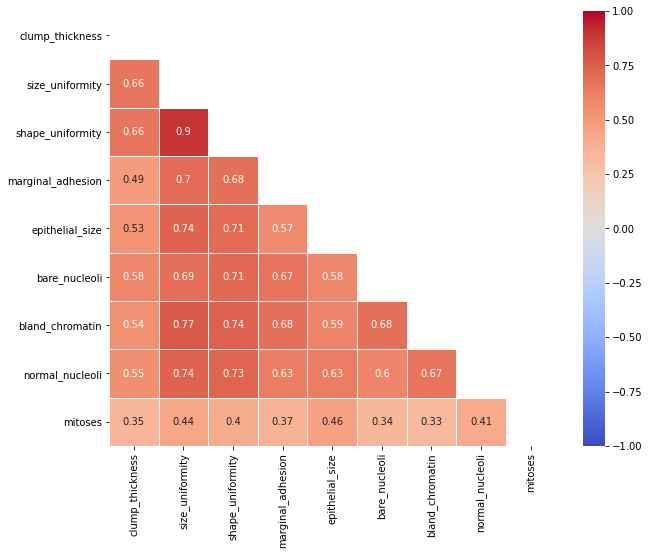

In [8]:
# check for intercorrelations in train set
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#---------------------------------------
fig, ax = plt.subplots(figsize = [10,8])
corr = df.corr()
matrix = np.triu(corr)
#--------------------------------------
sns.heatmap(data  = corr, 
            annot =  True, 
            vmin  = -1 , 
            vmax  = 1, 
            cmap  = 'coolwarm', 
            mask  = matrix, 
            linewidths=0.5,
            linecolor='white');

Only the `'mitoses'` column seems to have low correlations with other features. The choice here is `'bland_chromatin'`, which has the lowest correlation with the `'mitoses'` column. 

Now create the feature matrix and the target vector for the training and test data set. Only use the `'bland_chromatin'` and `'mitoses'` columns as features. The target vector should be `'class'`.

**Tip:** For the training data set, the feature matrix should be named `features_train` and the target vector `target_train`. Make sure you standardize the features to make them comparable to each other.


In [9]:
# feature matrix and target vector for train set
from sklearn.preprocessing import StandardScaler

features_train = df.loc[:, ['mitoses', 'bland_chromatin']]
target_train   = df.loc[:,'class']

scaler = StandardScaler()
features_train_standardized = scaler.fit_transform(features_train)


For the test data set, the feature matrix should be named`features_test` and the target vector `target_test`. Again, make sure you standardize the features in each case to make it possible to compare them.


In [10]:
# feature matrix and target vector for train set
df_test = pd.read_csv('breastcancer_test.csv')
df_test = df_test.astype({'class':'category', 'id':'category'})

features_test = df_test.loc[:, ['mitoses', 'bland_chromatin']]
target_test   = df_test.loc[:,'class']
features_test_standardized = scaler.transform(features_test)

### 3. Determining a suitable $k$ for the number of nearest neighbors for classification

Now that you've prepared the data, let's turn our attention to modeling. Our statistical model will use the k-nearest-neighbors algorithm.

Remember the following modeling steps for using `sklearn`:
1. Select model type
2. Instantiate the model with certain hyperparameters
3. Split data into a feature matrix and target vector
4. Model fitting
5. Making predictions with the trained model

Evaluate the performance of your k-nearest-neighbors algorithm based on the **test data set**, for different numbers of nearest neighbors, namely from one to ten nearest neighbors. 

To do this, write a `for` loop that iterates through the number of nearest neighbors. In the loop, instantiate your statistical model (`KNeighborsClassifier()`) and fit it to the training data set. Using the trained model, predict the target vector based on the standardized features of the test data set. Then calculate the accuracy (`accuracy_score()`) for the respective fitted model and store it in a list.


In [11]:
# model evaluation with accuracy for k=1 to k=10

from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import accuracy_score       #, recall_score, precision_score, f1_score

df_score = pd.DataFrame(columns = ['KNN #', 'Accuracy'])
for k in range(1,12):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(features_train_standardized, target_train)
    #-----------------------------------------------------------
    target_test_pred = model.predict(features_test_standardized)
    df_score.loc[k-1, 'KNN #'] = k
    df_score.loc[k-1, 'Accuracy'] = accuracy_score(target_test, target_test_pred)
    
df_score= df_score.astype({'KNN #': 'int32', 'Accuracy':'float64'})
df_score.style.hide_index()                             # [df_score.Accuracy == df_score.Accuracy.max()]

KNN #,Accuracy
1,0.828571
2,0.842857
3,0.871429
4,0.885714
5,0.857143
6,0.871429
7,0.857143
8,0.857143
9,0.857143
10,0.857143


In [12]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(features_train_standardized, target_train)
target_test_pred = model_knn.predict(features_test_standardized)


Then plot the accuracy values for each $k$ value from 1 to 10. Plot the accuracy on the y-axis and the number of nearest neighbors on the x-axis.


In [13]:
# plot accuracy scores
df_score.loc[:,'Accuracy']
df_score = df_score.astype({'KNN #': 'int32', 'Accuracy':'float64'})

df_score[df_score.Accuracy == df_score.Accuracy.max()].style.hide_index()

KNN #,Accuracy
4,0.885714


Now select the k-value that achieved the best accuracy value and instantiate your model again. It now provides a confusion matrix (`confusion_matrix()`) that tells you the number of true-positive, false-positive, true-negative, and false-negative cases in the test data set.


In [14]:
# choose k with best accuracy among k=1 and k=10 and plot confusion matrix for test dataset

from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_test_pred)

array([[40,  3],
       [ 5, 22]])

0.8857142857142857


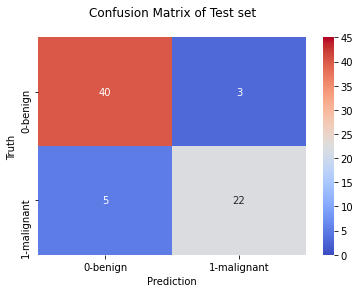

In [15]:
# code from markus on 07.09.2023 last day of his mentoring 

model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(features_train_standardized, target_train)
target_test_pred = model_knn.predict(features_test_standardized)

print(accuracy_score(target_test, target_test_pred)) # optional; just for demonstration

from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(target_test, target_test_pred), 
            annot=True, 
            ax=ax, 
            cmap= 'coolwarm', 
            vmin = 0, 
            vmax = 45)

ax.set_xlabel('Prediction')
ax.set_ylabel('Truth')
ax.xaxis.set_ticklabels(['0-benign', '1-malignant'])
ax.yaxis.set_ticklabels(['0-benign', '1-malignant'])
ax.set_title('Confusion Matrix of Test set\n');

In [16]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

perf_measure(target_test, target_test_pred)

(22, 3, 40, 5)

You should find 40 true-negative cases (tumor is benign and predicted to be benign) and 22 true-positive cases (tumor is malignant and also predicted to be malignant) in the data set.


### 4. Classification of cancer cell samples as benign or malignant 

Your algorithm is now trained and can be used to predict whether the cancer cells in the samples in the target data set are benign or malignant.

Now create the feature matrix for the target dataset as well and store it in `features_aim`. The features should be the `'bland_chromatin'` and `'mitoses'` columns. The target vector is not present here because the `'class'` column contains only `NaN` values, i.e. the actual target values are unknown. Also remember to standardize your features here and store them in `features_aim_standardized`. Predict these target values, i.e., whether the cancer cells are benign or malignant, using the trained model from `features_aim_standardized`. Store these predictions in `target_aim_pred` and add your predictions as a new column named `'class_pred'` to the end of `df_aim`. Then print the first 5 lines of `df_aim`.


In [17]:
# feature matrix and prediction of target vector for df_aim  breastcancer_aim.csv
df_aim = pd.read_csv('breastcancer_aim.csv')
df_aim = df_aim.astype({'class':'category', 'id':'category'})

features_aim = df_aim.loc[:, ['mitoses', 'bland_chromatin']]
target_aim   = df_aim.loc[:,'class']
features_aim_standardized = scaler.transform(features_aim)
target_aim_pred = model.predict(features_aim_standardized)
df_aim['class_pred'] = target_aim_pred
df_aim.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,class_pred
0,1347943,5,2,2,2,2,1.0,1,1,2,NaN,0
1,1148278,3,3,6,4,5,8.0,4,4,1,NaN,1
2,706426,5,5,5,2,5,10.0,4,3,1,NaN,1
3,1075123,3,1,2,1,2,1.0,2,1,1,NaN,0
4,1183240,4,1,2,1,2,1.0,2,1,1,NaN,0


Filter for all predictions that predict malignant (malignant=`1`) breast cancer. Determine the number of these samples in the target data.


In [18]:
# mask for malignant tumor cells in df_aim
mask_malignant = df_aim['class_pred'] == 1
len(df_aim.loc[mask_malignant,:])

27

How many malignant tumors could you find in the target data based on your trained model?


**Congratulations:** You identified 27 (potentially) malignant tumors in the cell samples using the k-Nearest-Neighbors algorithm in the target data set. We selected only two features `'bland_chromatin'` and `'mitoses'` in this case because they showed the lowest intercorrelation. If we had included more features, our model assumption that our features were independent would have been violated. However, in your prediction you should keep in mind that our algorithm of considering k=4 nearest neighbors for deciding whether a tumor is malignant or benign could still achieve a good prediction accuracy of about 88.6% on the test data, but isn't perfect either. So, we can predict false-positive or false-negative cases in the data, just like in the test data set. Now, if we were to visualize the decision boundary of the standardized features `'bland_chromatin'` and `'mitoses'` for the target data set `df_aim`, it would look like this:

<img src="breastcancer_aim-decision-treshold_standardized.png">

We should also recap that with unequal classes, accuracy  is not a good measure of model quality in this data set, but this was the instruction your superiors gave you. We'll learn how to deal with unbalanced classes later in the course. In any case, it would have been better to use another metric such as recall, precision, or the harmonic mean of both metrics (F1 value).


In [43]:
# ======================= this is the 2nd possibility with GridSearchCV added on Sunday 24.09.23 ==================
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import Pipeline

k = range(1, 30)  
search_space_knn = {'knn__n_neighbors': k,  
                    'knn__weights': ['uniform', 'distance']}

pipeline_knn = Pipeline([('std', StandardScaler()),
                         ('knn', KNeighborsClassifier()) 
                        ])
model_knn = GridSearchCV(estimator = pipeline_knn,
                         param_grid = search_space_knn,
                         scoring    = 'accuracy',
                         n_jobs     = -1,
                         cv         = 5)
model_knn.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 30),
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [44]:
print(model_knn.best_estimator_)
print('-----------------------------')
print(model_knn.best_score_)
print('-----------------------------')
print(model_knn.best_params_)

Pipeline(steps=[('std', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=14))])
-----------------------------
0.9319571865443426
-----------------------------
{'knn__n_neighbors': 14, 'knn__weights': 'uniform'}


In [45]:
grid_model = model_knn.best_estimator_

In [49]:
target_test_pred_grid = grid_model.predict(features_test)
confusion_m = confusion_matrix(target_test, target_test_pred_grid)
confusion_m

array([[39,  4],
       [ 5, 22]])

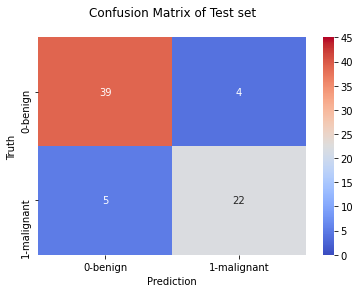

In [50]:
fig, ax = plt.subplots()
sns.heatmap(confusion_m, 
            annot=True, 
            ax=ax, 
            cmap= 'coolwarm', 
            vmin = 0, 
            vmax = 45)

ax.set_xlabel('Prediction')
ax.set_ylabel('Truth')
ax.xaxis.set_ticklabels(['0-benign', '1-malignant'])
ax.yaxis.set_ticklabels(['0-benign', '1-malignant'])
ax.set_title('Confusion Matrix of Test set\n');

In [51]:
target_aim_pred_grid = grid_model.predict(features_aim)
df_aim['class_pred_GridCV'] = target_aim_pred_grid
df_aim.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,class_pred,class_pred_GridCV
0,1347943,5,2,2,2,2,1.0,1,1,2,NaN,0,0
1,1148278,3,3,6,4,5,8.0,4,4,1,NaN,1,1
2,706426,5,5,5,2,5,10.0,4,3,1,NaN,1,1
3,1075123,3,1,2,1,2,1.0,2,1,1,NaN,0,0
4,1183240,4,1,2,1,2,1.0,2,1,1,NaN,0,0


In [25]:
mask_malignant_grid = df_aim['class_pred_GridCV'] == 1
len(df_aim.loc[mask_malignant_grid,:])

27

In [28]:
df_aim.class_pred.equals(df_aim['class_pred_GridCV'])

True

***
Do you have any questions about this exercise? Look in the [forum](https://platform.stackfuel.com/forums) to see if they have already been discussed.
***
Found a mistake? Contact Support at [support@stackfuel.com](mailto:support@stackfuel.com?subject=[StackFuel-DSC-AZAV]%20Module1%20Chapter2%20Notebook1).
***
